In [1]:
# Import necessary libraries
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from pathlib import Path

In [2]:
# Read price data
file_path = Path("../part 1 ETL Workflow/working.csv")
df_price = pd.read_csv(file_path)

# Display sample data
df_price.head()

,product,RetailPrice,energy_100g,fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,g_sum,other_carbs,...,boxcox_reconstructed_energy,transformed_reconstructed_energy,boxcox_g_sum,transformed_g_sum,cluster,category,certainty,alternative_cluster,alternative_category,anomaly
0,Artichoke,2.4703,314.0,6.67,3.33,1.67,1.67,0.76200,12.0,1.66,...,-0.263470,-1.033042,-0.290163,-1.195525,4,creams & dips,1.0000,6,strange cluster 6,0
1,Asparagus,2.9531,222.0,3.53,3.53,1.18,2.35,0.14986,10.0,2.35,...,-0.416842,-1.207215,-0.381893,-1.241809,4,creams & dips,0.6441,18,tomato sauce,0
2,Beets,1.1431,167.0,0.00,10.00,2.00,2.00,0.12700,12.0,8.00,...,-0.458748,-1.254806,-0.290163,-1.195525,18,tomato sauce,0.9965,1,beans & peas,0
3,Broccoli,2.3458,121.0,0.00,4.71,2.35,3.53,0.07366,8.0,2.36,...,-0.562940,-1.373130,-0.470604,-1.286569,18,tomato sauce,1.0000,8,yoghurt and milk,0
4,Carrots,1.1979,159.0,0.00,8.97,6.41,1.28,0.19558,10.0,2.56,...,-0.506612,-1.309162,-0.381893,-1.241809,18,tomato sauce,0.9999,8,yoghurt and milk,0


In [9]:


# Select relevant features and the target variable
features = ["transformed_carbohydrates_100g",
            "transformed_fat_100g",
            "transformed_proteins_100g",
            "transformed_sugars_100g",
            "transformed_salt_100g",
            "transformed_other_carbs",
            "transformed_energy_100g",
            "transformed_reconstructed_energy",
            "transformed_g_sum"]
target = 'RetailPrice'

# Drop rows with missing values in the target variable
df_clean = df_price.dropna(subset=[target])

# Prepare the data for training
X = df_clean[features]
y = df_clean[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display the coefficients, MSE, and R-squared value
coefficients = model.coef_
intercept = model.intercept_

mse, r2, coefficients, intercept

(20.096770364078832,
 0.16783262136165855,
 array([  2.12779448,  -0.3721974 ,   0.9802586 ,   0.85507936,
          1.29027007,   0.72153363,   4.09298962,   6.01269459,
        -10.83215698]),
 7.909002746146379)

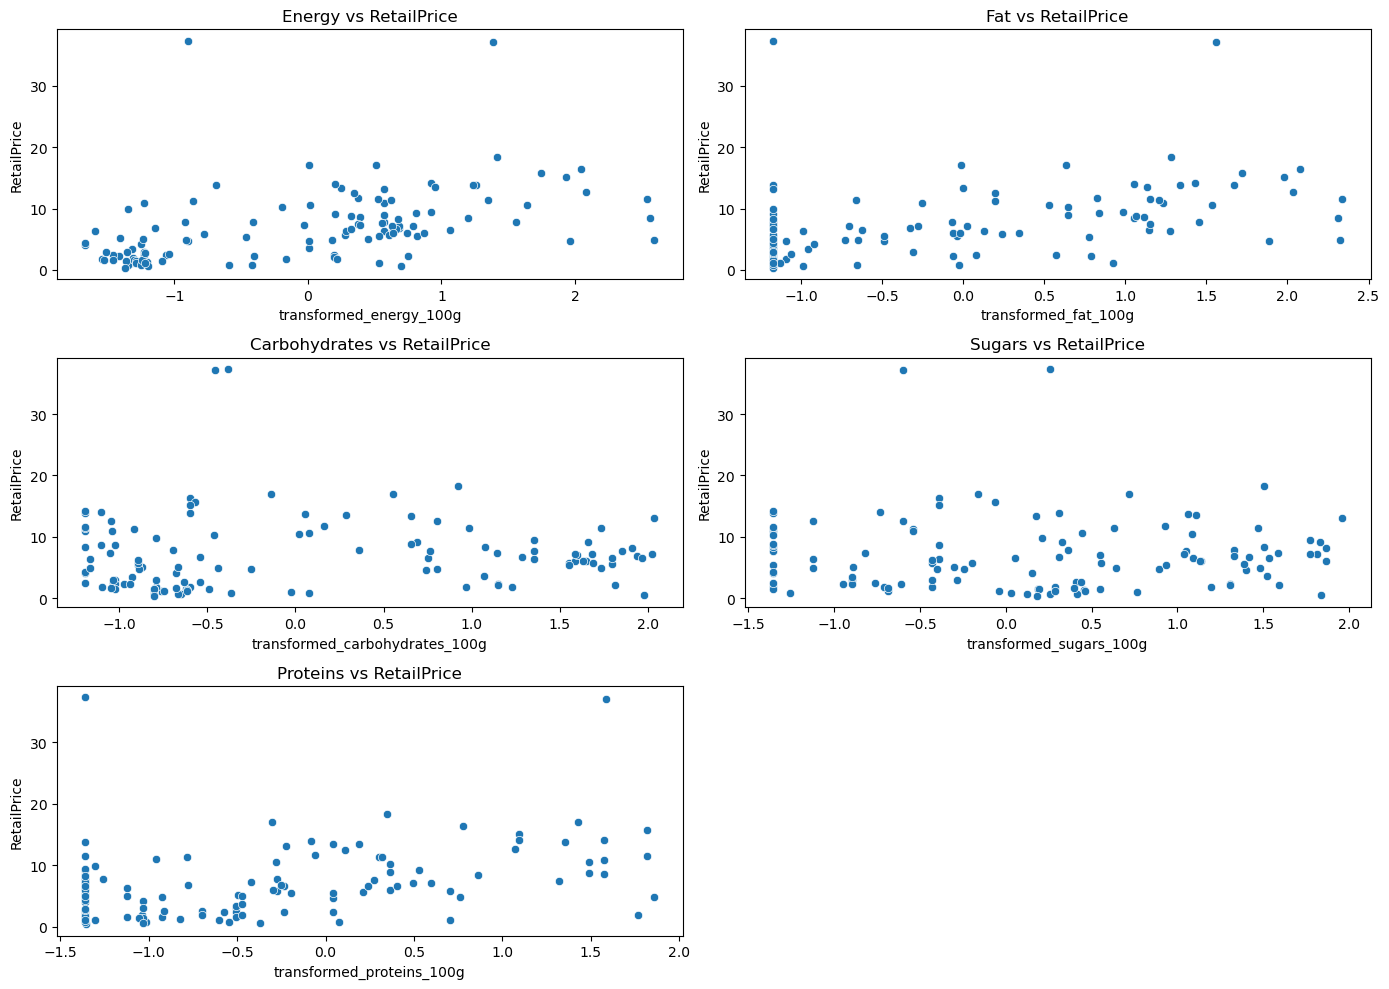

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure and axis for subplots
fig, axes = plt.subplots(3, 2, figsize=(14, 10))

# Scatter plots of each feature vs RetailPrice
sns.scatterplot(x='transformed_energy_100g', y='RetailPrice', data=df_clean, ax=axes[0, 0])
axes[0, 0].set_title('Energy vs RetailPrice')

sns.scatterplot(x='transformed_fat_100g', y='RetailPrice', data=df_clean, ax=axes[0, 1])
axes[0, 1].set_title('Fat vs RetailPrice')

sns.scatterplot(x='transformed_carbohydrates_100g', y='RetailPrice', data=df_clean, ax=axes[1, 0])
axes[1, 0].set_title('Carbohydrates vs RetailPrice')

sns.scatterplot(x='transformed_sugars_100g', y='RetailPrice', data=df_clean, ax=axes[1, 1])
axes[1, 1].set_title('Sugars vs RetailPrice')

sns.scatterplot(x='transformed_proteins_100g', y='RetailPrice', data=df_clean, ax=axes[2, 0])
axes[2, 0].set_title('Proteins vs RetailPrice')

# Hide the unused subplot
axes[2, 1].axis('off')

plt.tight_layout()
plt.show()

#### Basic Supervised Learning Workflow

1. **Instantiate** (or Create)
2. **Fit** 
3. **Predict** 
4. **Evaluate**

###### stop, trying the same data set from random forest #######

# need an etl for this if works

In [5]:
# Step 3: Drop rows with missing target values (if any)
df_cleaned = df_price.dropna(subset=['RetailPrice'])

# Step 4: Feature selection
# Dropping columns that are not relevant to the model (like product names and clustering information for now)
features = df_cleaned.drop(columns=['product', 'category', 'alternative_category', 'cluster', 'alternative_cluster', 'anomaly'])

# Step 5: Prepare the target variable
target = df_cleaned['RetailPrice']


In [11]:
X = df_clean[features]
y = df_clean[target]


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

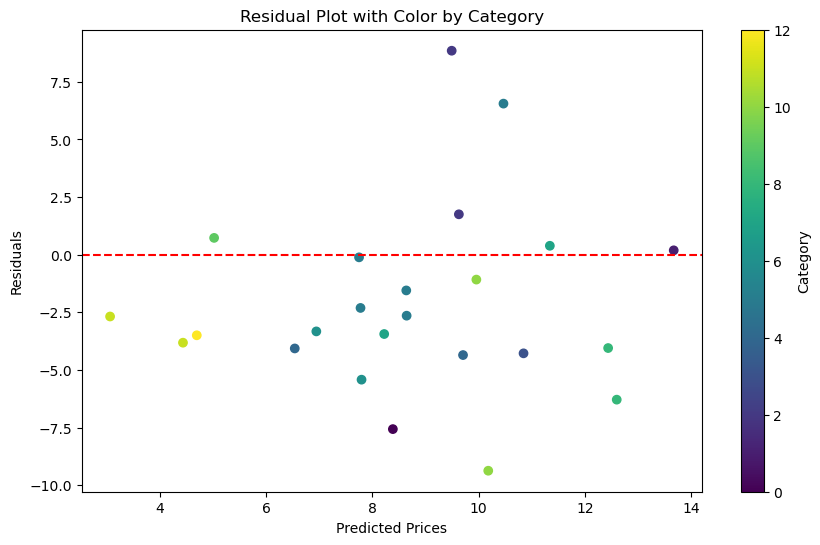

In [12]:
import matplotlib.pyplot as plt

# Calculate residuals
residuals = y_test - y_pred

# Create residual plot with color-coding based on the 'category' column
plt.figure(figsize=(10, 6))
sc = plt.scatter(y_pred, residuals, c=df_clean.loc[y_test.index, 'category'].astype('category').cat.codes, cmap='viridis')
plt.colorbar(sc, label='Category')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.title('Residual Plot with Color by Category')
plt.show()

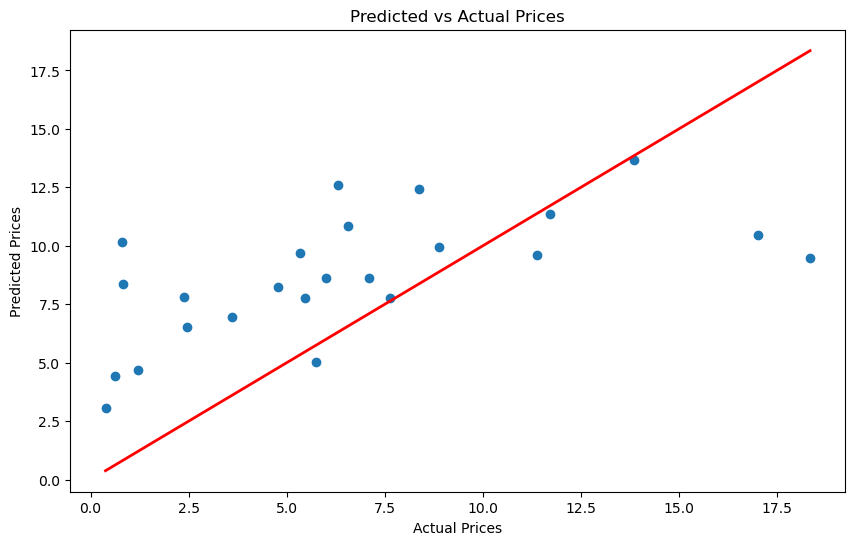

In [13]:
# Create a scatter plot for predicted vs actual prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Predicted vs Actual Prices')
plt.show()

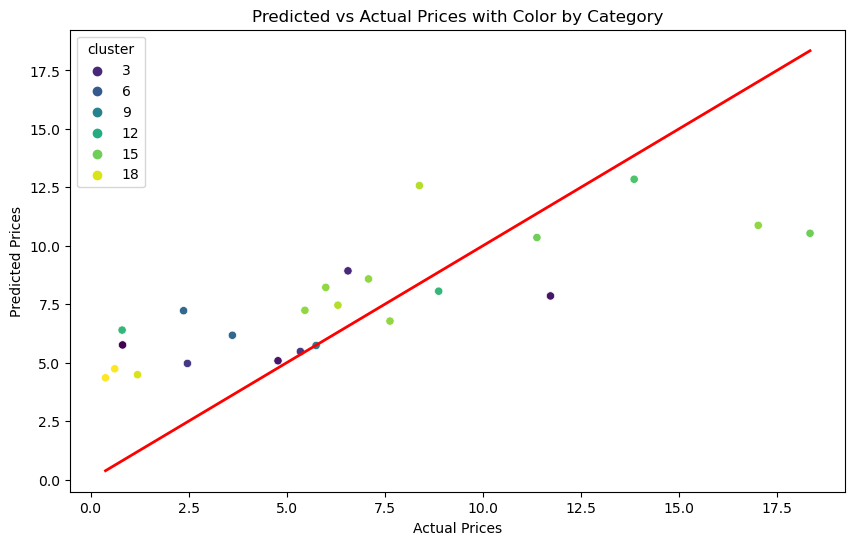

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot of predicted vs actual prices with color based on 'category'
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, hue=df_clean.loc[y_test.index, 'cluster'], palette="viridis")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Predicted vs Actual Prices with Color by Category')
plt.show()